# KaggleX BIPOC Mentorship Program

### Problem Statement: 

Music Information Retrieval and Multiclass Classification of Music Files using Deep Learning and Librosa.

### Dataset Description:

The dataset consists of 2500 .wav files labelled with the five emotions:

* Aggressive (500 files)
* Dramatic (500 files)
* Happy (500 files)
* Romantic (500 files)
* Sad (500 files)

So, let's get started by importing the required libraries for data visualization and exploratory data analysis!

## Importing Libraries and Accessing Data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython
import librosa
import librosa.display
# Using librosa to convert .wav files to data we can feed into an ANN model.

In [2]:
# To clean up the notebook
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [3]:
# Accessing the dataset
musicMoodClass = "/kaggle/input/music-mood-classification"

In [4]:
# function to link each of the wave files to their "target" emotion
# returning a pandas dataframe
def create_dataframe(dir):
    target = []
    audio = []
    for i in os.listdir(dir):
        for j in os.listdir(dir + "/" + str(i)):
            for k in os.listdir(dir + "/" + i + "/" + j): 
                target.append(str(j))
                audio.append(dir + "/" + str(i) + "/" + j + "/" + k)
        df = pd.DataFrame(columns=["audio", "target"])
        df["audio"] = audio
        df["target"] = target
    return df

In [5]:
df = create_dataframe(musicMoodClass)

## Data Exploration

In [6]:
# extracts the top five rows of the dataframe
df.head()

,audio,target
0,/kaggle/input/music-mood-classification/datase...,aggressive
1,/kaggle/input/music-mood-classification/datase...,aggressive
2,/kaggle/input/music-mood-classification/datase...,aggressive
3,/kaggle/input/music-mood-classification/datase...,aggressive
4,/kaggle/input/music-mood-classification/datase...,aggressive


In [7]:
# A look at number of audio files for each target value
df["target"].value_counts()

aggressive    500
sad           500
romantic      500
happy         500
dramatic      500
Name: target, dtype: int64

Using Librosa and IPython to look at the audio files.

In [8]:
print(df.iloc[0, 1])
IPython.display.Audio(df.iloc[0, 0])

aggressive


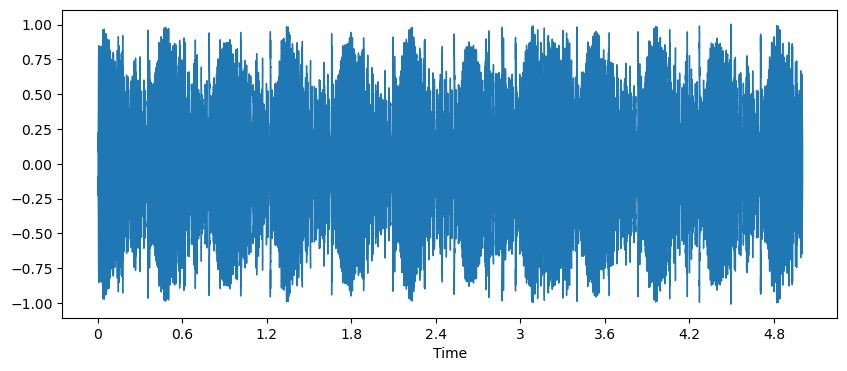

In [9]:
fig = plt.figure(figsize=(10, 4))
x, fs = librosa.load(df.iloc[0, 0])
librosa.display.waveshow(x, fs)
plt.show()

In [10]:
print(df.iloc[-1, 1])
IPython.display.Audio(df.iloc[-3, 0])

dramatic


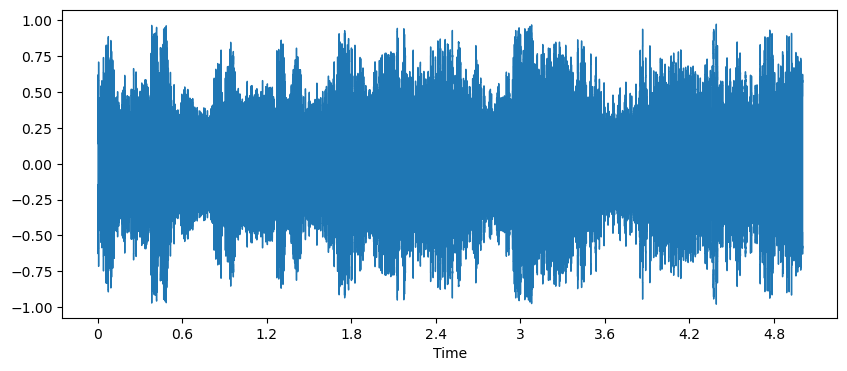

In [11]:
fig = plt.figure(figsize=(10, 4))
x, fs = librosa.load(df.iloc[-3, 0])
librosa.display.waveshow(x, fs)
plt.show()

In [12]:
# Add paths and get signals for a random audio file picked for each of the target values.

file1 = '/kaggle/input/music-mood-classification/dataset/aggressive/6806.wav'
signal1, sample_rate = librosa.load(file1, sr=22050)

file2 = '/kaggle/input/music-mood-classification/dataset/dramatic/14398.wav'
signal2, sample_rate = librosa.load(file2, sr=22050)

file3 = '/kaggle/input/music-mood-classification/dataset/happy/17886.wav'
signal3, sample_rate = librosa.load(file3, sr=22050)

file4 = '/kaggle/input/music-mood-classification/dataset/romantic/19326.wav'
signal4, sample_rate = librosa.load(file4, sr=22050)

file5 = '/kaggle/input/music-mood-classification/dataset/sad/10057.wav'
signal5, sample_rate = librosa.load(file5, sr=22050)

In [13]:
signal1

array([ 0.00390111,  0.00533678,  0.00475217, ..., -0.02922867,
       -0.0319423 , -0.03665368], dtype=float32)

In [14]:
signal1.shape

(110250,)

Let's take a look at waveforms of each of the signals!

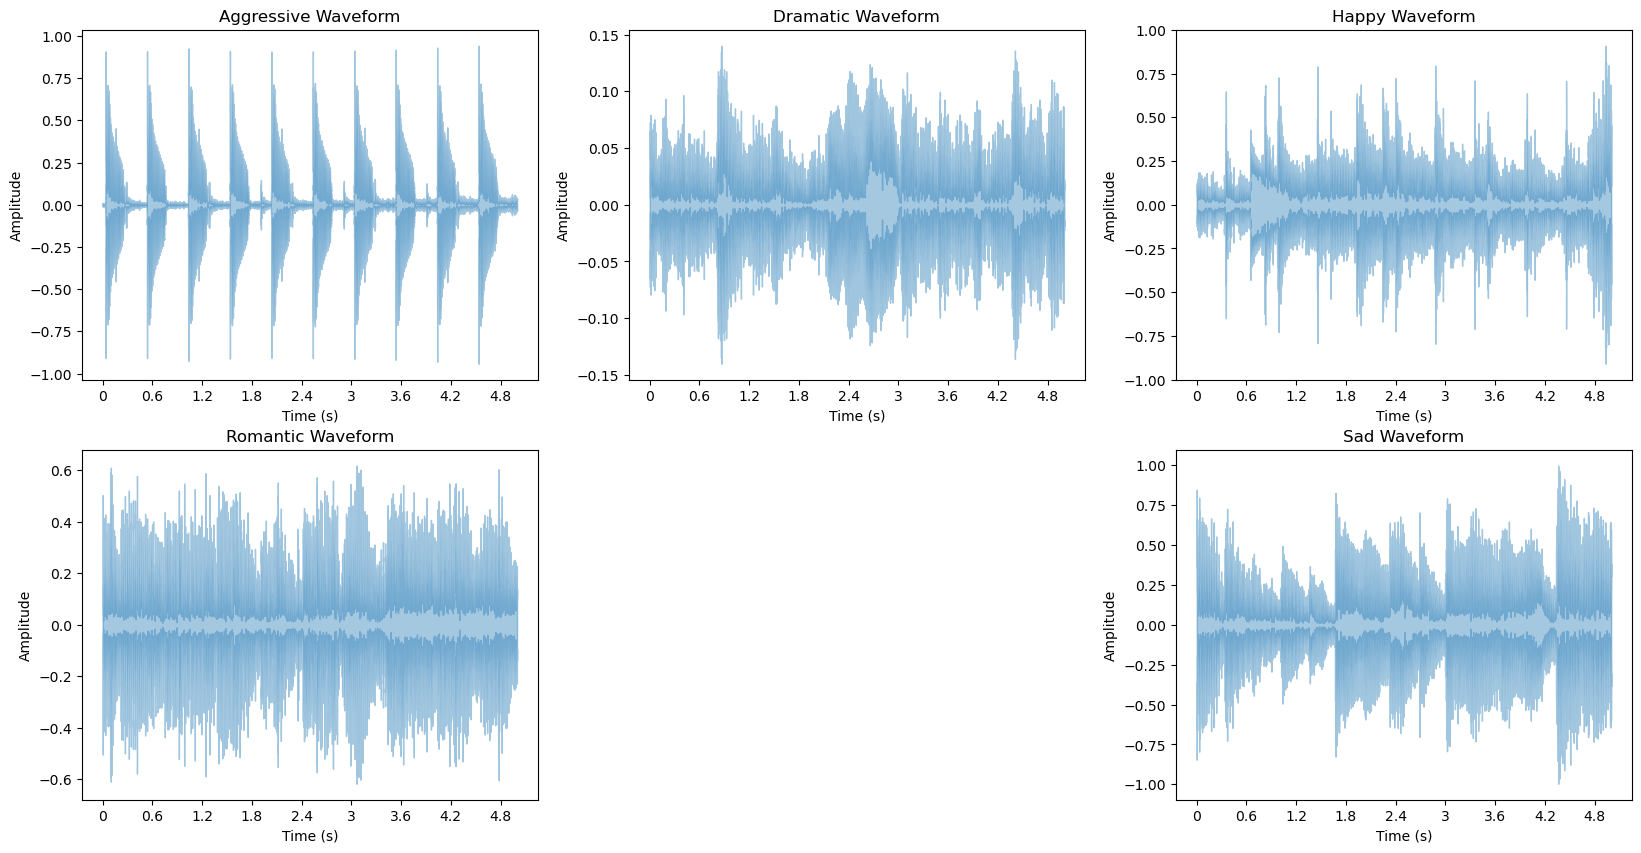

In [15]:
fig = plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
librosa.display.waveshow(signal1, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Aggressive Waveform")

plt.subplot(2, 3, 2)
librosa.display.waveshow(signal2,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Dramatic Waveform")

plt.subplot(2, 3, 3)
librosa.display.waveshow(signal3,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Happy Waveform")

plt.subplot(2, 3, 4)
librosa.display.waveshow(signal4,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Romantic Waveform")

plt.subplot(2, 3, 6)
librosa.display.waveshow(signal5,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sad Waveform")
plt.show()

##### MFCC

The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR (Music Information Retrieval), it is often used to describe timbre.

In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Useful links:

* https://en.wikipedia.org/wiki/Mel-frequency_cepstrum
* https://musicinformationretrieval.com/mfcc.html

In [16]:
MFCC1 = librosa.feature.mfcc(signal1, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCC2 = librosa.feature.mfcc(signal2, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCC3 = librosa.feature.mfcc(signal3, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCC4 = librosa.feature.mfcc(signal4, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCC5 = librosa.feature.mfcc(signal5, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)

In [17]:
MFCC1.shape

(40, 431)

Text(0.5, 1.0, 'Sad Waveform')

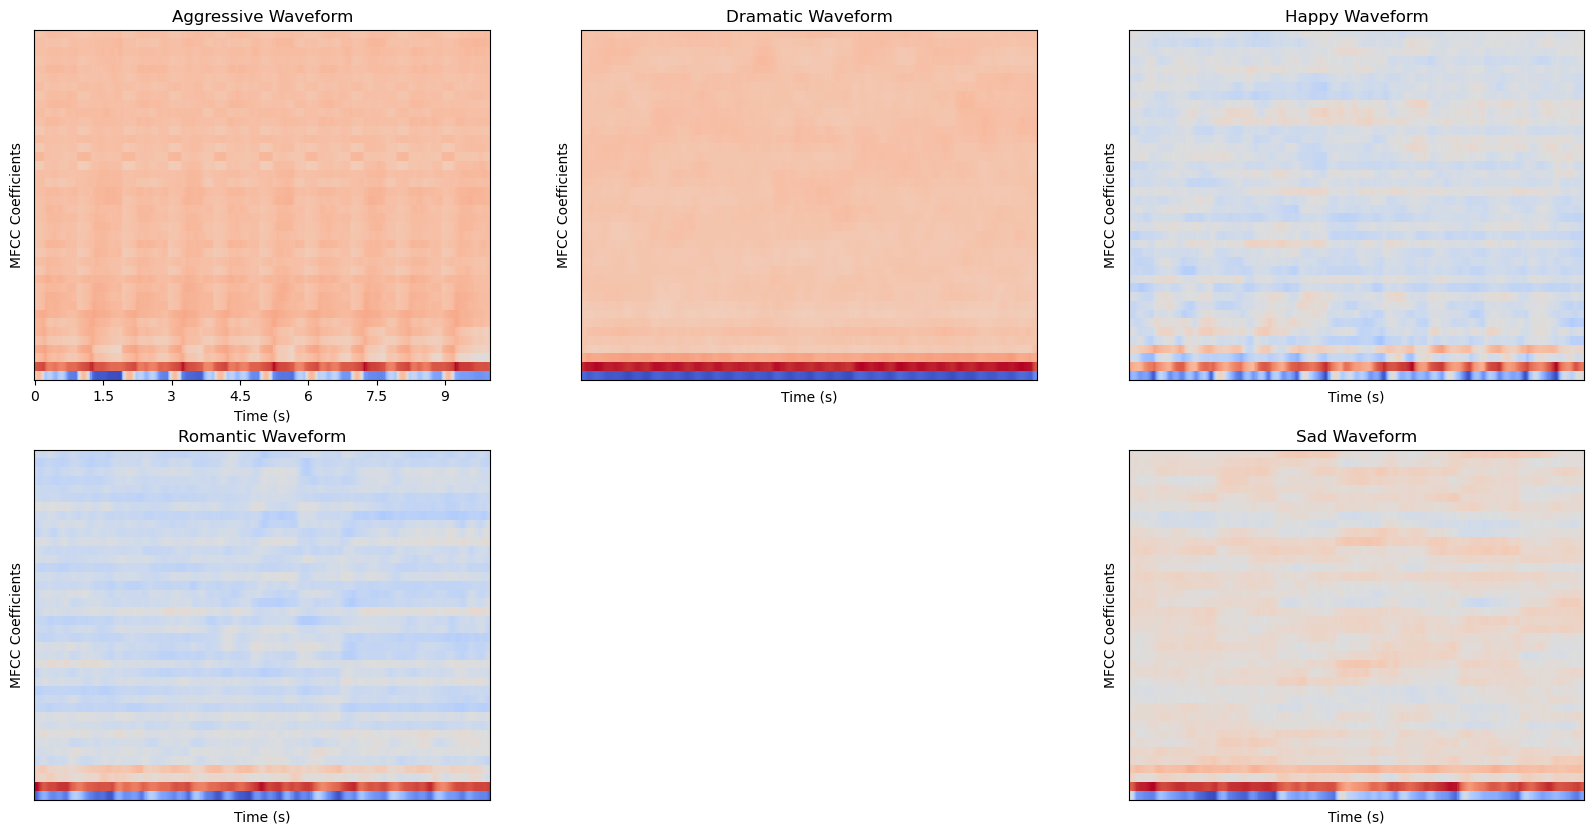

In [18]:
fig = plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
librosa.display.specshow(MFCC1, sr=sample_rate, x_axis='time')
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.title("Aggressive Waveform")

plt.subplot(2, 3, 2)
librosa.display.specshow(MFCC2, sr=sample_rate, hop_length=256)
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.title("Dramatic Waveform")

plt.subplot(2, 3, 3)
librosa.display.specshow(MFCC3, sr=sample_rate, hop_length=256)
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.title("Happy Waveform")

plt.subplot(2, 3, 4)
librosa.display.specshow(MFCC4, sr=sample_rate, hop_length=256)
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.title("Romantic Waveform")

plt.subplot(2, 3, 6)
librosa.display.specshow(MFCC5, sr=sample_rate, hop_length=256)
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.title("Sad Waveform")

##### Zero Crossing Rate

The zero crossing rate indicates the number of times that a signal crosses the horizontal axis.

The zero-crossing rate (ZCR) is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive. Its value has been widely used in both speech recognition and music information retrieval, being a key feature to classify percussive sounds.

Useful links:

* https://en.wikipedia.org/wiki/Zero-crossing_rate
* https://musicinformationretrieval.com/zcr.html

This computes a binary mask whre True indicates the presence of a zero crossing.

In [19]:
zero_crossings = librosa.zero_crossings(signal1, pad=False)

In [20]:
zero_crossings

array([False, False, False, ..., False, False, False])

In [21]:
print(zero_crossings.sum(), " : sum")
print(zero_crossings.shape, " : shape")

5599  : sum
(110250,)  : shape


##### Chroma STFT

A chroma vector is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal. 

Useful links:

* https://librosa.org/doc/main/generated/librosa.feature.chroma_stft.html

In [22]:
# Using an energy (magnitude) spectrum instead of power spectrogram
S1 = np.abs(librosa.stft(signal1))
chroma_stft1 = librosa.feature.chroma_stft(S=S1, sr=sample_rate)

# Using a pre-computed power spectrogram with a larger frame
S2 = np.abs(librosa.stft(signal1, n_fft=4096))**2
chroma_stft2 = librosa.feature.chroma_stft(S=S2, sr=sample_rate)

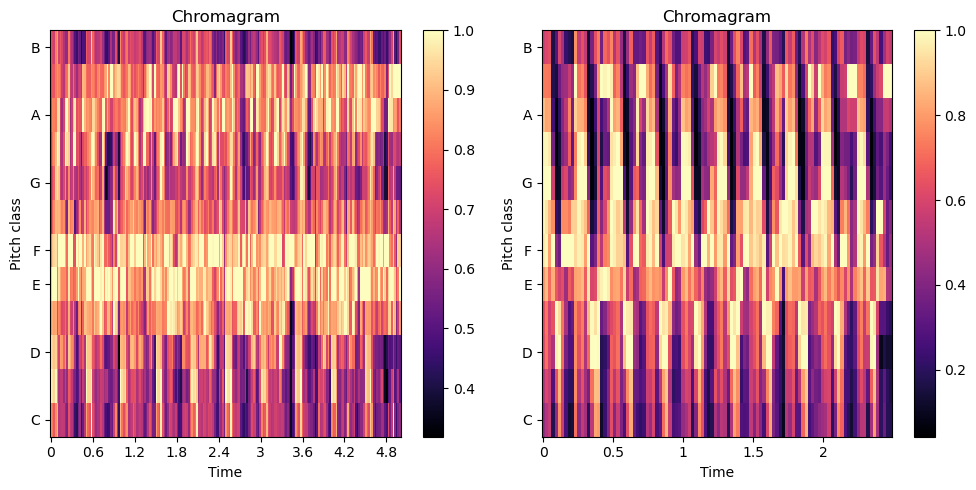

In [23]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
librosa.display.specshow(chroma_stft1, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')

plt.subplot(1, 2, 2)
librosa.display.specshow(chroma_stft2, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

##### RMS

The energy of a signal corresponds to the total magntiude of the signal. For audio signals, that roughly corresponds to how loud the signal is.

Computing the RMS value from audio samples is faster as it doesn’t require a STFT calculation. 

Useful links:

* https://librosa.org/doc/main/generated/librosa.feature.rms.html

Playing a note often coincides with a sudden increase in signal energy. To detect this sudden increase, we will compute an energy novelty function:

* Compute the short-time energy in the signal.
* Compute the first-order difference in the energy.
* Half-wave rectify the first-order difference.

In [24]:
hop_length = 256
frame_length = 100
energy = np.array([sum(abs(x[i: i + frame_length] ** 2)) for i in range(0, len(x), hop_length)])

In [25]:
energy.shape

(431,)

In [26]:
rmse = librosa.feature.rms(signal1, frame_length=frame_length, hop_length=hop_length, center=True)
rmse = rmse[0]
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sample_rate, hop_length=hop_length)
rmse_diff = np.zeros_like(rmse)
rmse_diff[1:] = np.diff(rmse)
energy_novelty = np.max([np.zeros_like(rmse_diff), rmse_diff], axis=0)

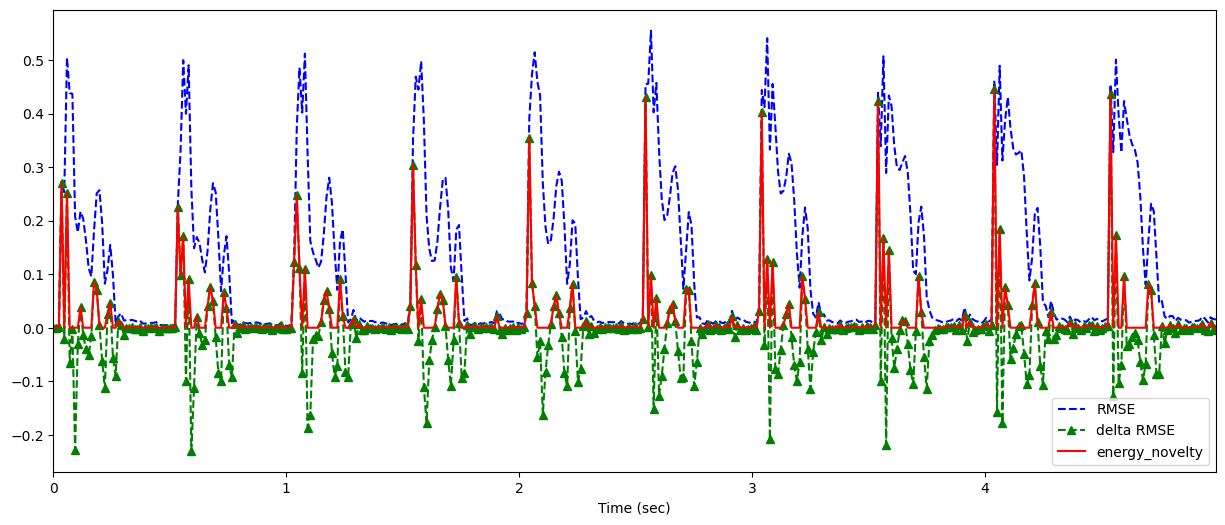

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(t, rmse, 'b--', t, rmse_diff, 'g--^', t, energy_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('RMSE', 'delta RMSE', "energy_novelty")) 
plt.show()

##### Mel Spectrogram

A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale. In 1937, Stevens, Volkmann, and Newmann proposed a unit of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the mel scale.

Useful links:
* https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53
* https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html

In [28]:
spec1 = librosa.feature.melspectrogram(y=signal1, sr=sample_rate)
spec2 = librosa.feature.melspectrogram(y=signal2, sr=sample_rate)
spec3 = librosa.feature.melspectrogram(y=signal3, sr=sample_rate)
spec4 = librosa.feature.melspectrogram(y=signal4, sr=sample_rate)
spec5 = librosa.feature.melspectrogram(y=signal5, sr=sample_rate)

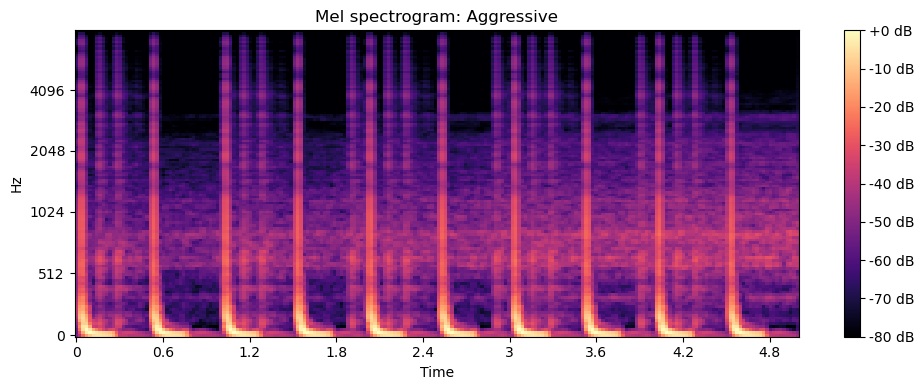

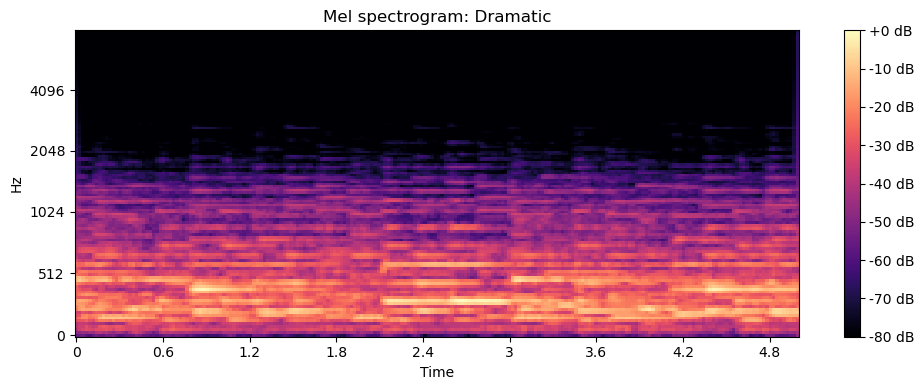

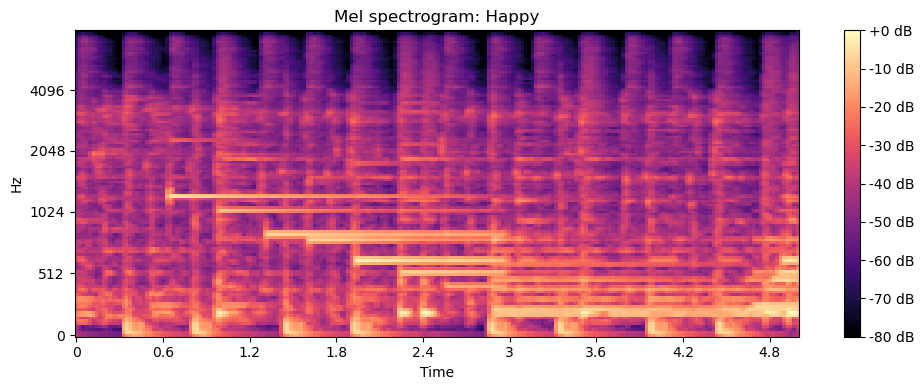

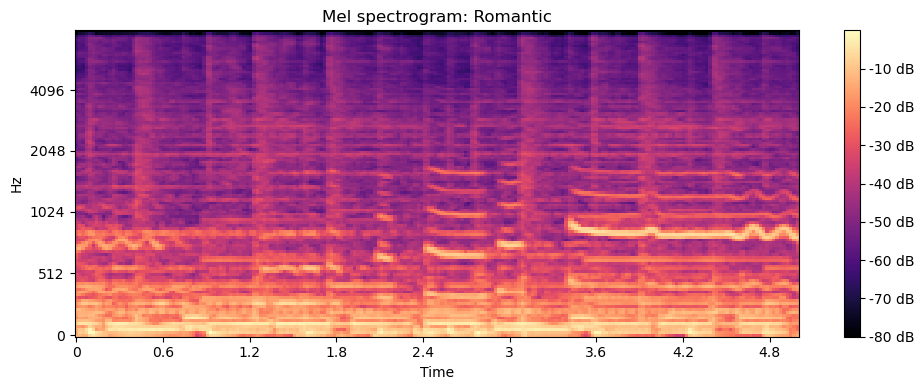

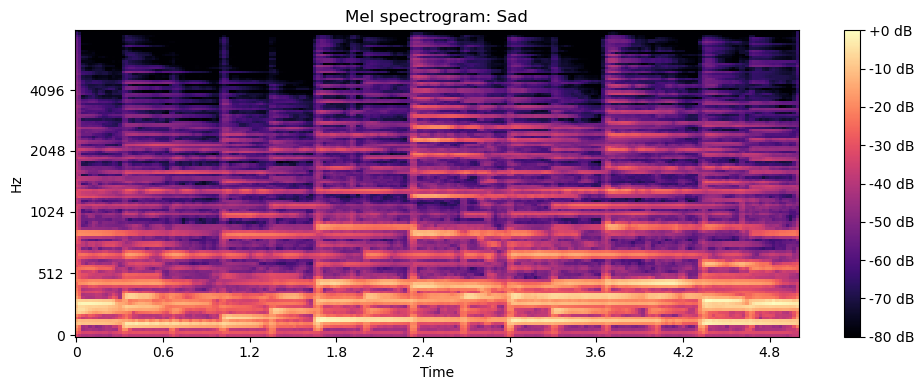

In [29]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spec1, ref=np.max),
                          y_axis='mel', fmax=8000,
                          x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram: Aggressive')
plt.tight_layout()

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spec2, ref=np.max),
                          y_axis='mel', fmax=8000,
                          x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram: Dramatic')
plt.tight_layout()


plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spec3, ref=np.max),
                          y_axis='mel', fmax=8000,
                          x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram: Happy')
plt.tight_layout()


plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spec4, ref=np.max),
                          y_axis='mel', fmax=8000,
                          x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram: Romantic')
plt.tight_layout()


plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spec5, ref=np.max),
                          y_axis='mel', fmax=8000,
                          x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram: Sad')
plt.tight_layout()

## Feature Extraction

In [30]:
# function for Music Information Retrieval
def extract_features(data, sample_rate):
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data, hop_length=20).T, axis=0)
    result = np.hstack((result, zcr))
    
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate, n_fft=20, hop_length=20).T, axis=0)
    result = np.hstack((result, chroma_stft))
    
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=20).T, axis=0)
    result = np.hstack((result, mfcc))
    
    rms = np.mean(librosa.feature.rms(y=data, frame_length=100).T, axis=0)
    result = np.hstack((result, rms))
    
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate, hop_length=20).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

In [31]:
def feature_extractor(path):
    data, sample_rate = librosa.load(path)
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    return result

In [32]:
# this will take a lot of time to process 2500 files.
from IPython.display import clear_output
X, y = [], []
print("Extracting features...")
for index, (data, emotion) in enumerate(zip(df["audio"], df["target"])):
    feature = feature_extractor(data)
    X.append(feature)
    y.append(emotion)
    if index % 100 == 0:
        print("#", end="")
print("\ndone")

Extracting features...
#########################
done


In [33]:
X = np.array(X)
dataframe = pd.DataFrame(data = X[1:, 1:], 
                         columns = X [0, 1:])
dataframe["target"] = y[1:]

In [34]:
dataframe.head()

,0.8360232710838318,0.8782873749732971,0.9165267944335938,0.8189830183982849,0.7693920135498047,0.7316707372665405,0.7382094264030457,0.7354384660720825,0.7964585423469543,0.860139012336731,...,0.20210984349250793,0.2266748994588852,0.2141239494085312,0.10502240806818008,0.17391715943813324,0.17391526699066162,0.05577973276376724,0.0027245625387877226,4.732269371743314e-05,target
0,0.662739,0.676239,0.771144,0.750155,0.889555,0.725763,0.731914,0.683635,0.764994,0.716415,...,0.009571,0.009687,0.007289,0.008144,0.006721,0.004434,0.001123,0.000099,2.023869e-06,aggressive
1,0.859615,0.831238,0.753978,0.744659,0.687476,0.734185,0.668457,0.735191,0.789751,0.709302,...,0.057121,0.064532,0.047872,0.051109,0.052911,0.038470,0.008803,0.000840,1.772401e-05,aggressive
2,0.492635,0.605468,0.611532,0.638718,0.728488,0.629022,0.682220,0.571665,0.652452,0.772134,...,0.000436,0.000886,0.001939,0.002203,0.001568,0.000724,0.000246,0.000041,5.526315e-07,aggressive
3,0.671130,0.636116,0.757345,0.670204,0.798668,0.644175,0.715163,0.593572,0.682661,0.692987,...,0.013519,0.013239,0.010337,0.010737,0.008677,0.005895,0.001796,0.000155,2.903089e-06,aggressive
4,0.605710,0.804872,0.626399,0.635375,0.816839,0.688618,0.770401,0.630008,0.643190,0.701129,...,0.020401,0.019790,0.022406,0.017504,0.014359,0.010430,0.003964,0.000240,8.404331e-06,aggressive


So, now we have the extracted features saved as a dataframe. Since the process of feature extraction takes a lot of time, I'm going to save the extracted features as a csv file and upload it as a public dataset, so it's easier to run experiments.

Quoting one of the people I look up to, Machine Learning is a lot more about the skill of experimentation than it's about coding.

In [35]:
dataframe.shape

(2499, 162)

In [36]:
dataframe.to_csv("/kaggle/working/features.csv", index=False)

In [37]:
# To load the saved dataframe from the output directory:
dataframe = pd.read_csv("/kaggle/input/features-music-mood-classification/features.csv")

In [38]:
dataframe.shape

(2499, 162)

In [39]:
dataframe.head()

,0.8360232710838318,0.8782873749732971,0.9165267944335938,0.8189830183982849,0.7693920135498047,0.7316707372665405,0.7382094264030457,0.7354384660720825,0.7964585423469543,0.860139012336731,...,0.20210984349250793,0.2266748994588852,0.2141239494085312,0.10502240806818008,0.17391715943813324,0.17391526699066162,0.05577973276376724,0.0027245625387877226,4.732269371743314e-05,target
0,0.662739,0.676239,0.771144,0.750155,0.889555,0.725763,0.731914,0.683635,0.764994,0.716415,...,0.009571,0.009687,0.007289,0.008144,0.006721,0.004434,0.001123,0.000099,2.023869e-06,aggressive
1,0.859615,0.831238,0.753978,0.744659,0.687476,0.734185,0.668457,0.735191,0.789751,0.709302,...,0.057121,0.064532,0.047872,0.051109,0.052911,0.038470,0.008803,0.000840,1.772401e-05,aggressive
2,0.492635,0.605468,0.611532,0.638718,0.728488,0.629022,0.682220,0.571665,0.652452,0.772134,...,0.000436,0.000886,0.001939,0.002203,0.001568,0.000724,0.000246,0.000041,5.526315e-07,aggressive
3,0.671130,0.636116,0.757345,0.670204,0.798668,0.644175,0.715163,0.593572,0.682661,0.692987,...,0.013519,0.013239,0.010337,0.010737,0.008677,0.005895,0.001796,0.000155,2.903089e-06,aggressive
4,0.605710,0.804872,0.626399,0.635375,0.816839,0.688618,0.770401,0.630008,0.643190,0.701129,...,0.020401,0.019790,0.022406,0.017504,0.014359,0.010430,0.003964,0.000240,8.404331e-06,aggressive


## Initialising the data to build the model

In [40]:
# determining the features and the target values.
X = np.array(dataframe.drop(columns=["target"]))
y = np.array(dataframe["target"])

In [41]:
X

array([[6.62739336e-01, 6.76239371e-01, 7.71144032e-01, ...,
        1.12331018e-03, 9.91804845e-05, 2.02386946e-06],
       [8.59614968e-01, 8.31238270e-01, 7.53978372e-01, ...,
        8.80321860e-03, 8.40402499e-04, 1.77240145e-05],
       [4.92634803e-01, 6.05468392e-01, 6.11531794e-01, ...,
        2.45739997e-04, 4.10575776e-05, 5.52631491e-07],
       ...,
       [2.97235131e-01, 2.78116852e-01, 5.16316414e-01, ...,
        8.00740163e-05, 1.70435978e-05, 8.65645598e-06],
       [5.90296865e-01, 3.91401827e-01, 3.66908103e-01, ...,
        8.84609619e-07, 8.33618188e-08, 8.68261107e-09],
       [4.83761400e-01, 4.07114923e-01, 4.23213035e-01, ...,
        3.29898787e-03, 7.43923942e-04, 1.27782459e-05]])

In [42]:
y

array(['aggressive', 'aggressive', 'aggressive', ..., 'dramatic',
       'dramatic', 'dramatic'], dtype=object)

In [43]:
# splitting the dataset into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [44]:
X_train.shape

(1999, 161)

In [45]:
# extracting individual columns for each of the target values, one-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

In [47]:
from keras import regularizers

In [48]:
model = Sequential()
model.add(Dense(75, activation="relu", input_shape=(161, )))
model.add(Dense(50, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(5, activation="softmax"))

In [49]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                12150     
                                                                 
 dense_1 (Dense)             (None, 50)                3800      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 5)                 255       
                                                                 
Total params: 21,305
Trainable params: 21,305
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_split = 0.2,
    epochs = 100,
    batch_size = 16
)

Epoch 1/100
100/100 [==============================] - 3s 5ms/step - loss: 4.6127 - accuracy: 0.4134 - val_loss: 1.9384 - val_accuracy: 0.5875
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 1.6295 - accuracy: 0.6523 - val_loss: 1.4144 - val_accuracy: 0.6950
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 1.2680 - accuracy: 0.7430 - val_loss: 1.1401 - val_accuracy: 0.7650
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 1.0154 - accuracy: 0.8099 - val_loss: 0.9878 - val_accuracy: 0.8375
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.8596 - accuracy: 0.8718 - val_loss: 0.9934 - val_accuracy: 0.8325
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.8185 - accuracy: 0.8874 - val_loss: 0.8495 - val_accuracy: 0.8625
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.9199 - val_loss: 0.8071 - val_accuracy: 0.8750

In [52]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.1495 - accuracy: 0.9500


[0.14954860508441925, 0.949999988079071]

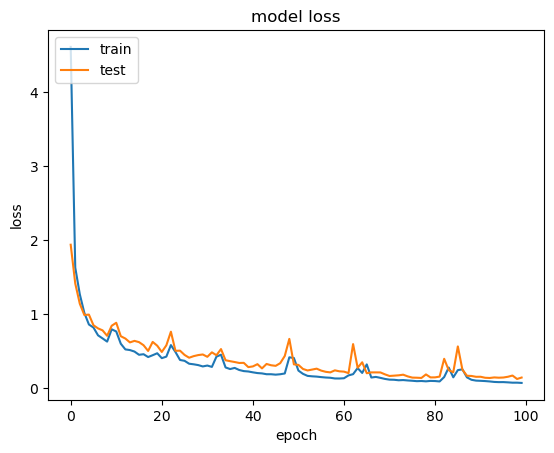

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

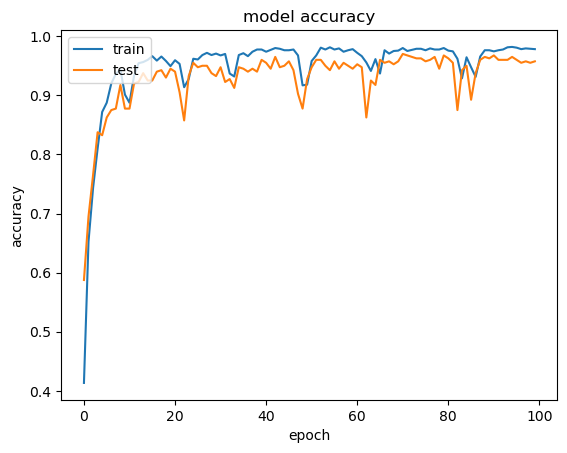

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

That's the end of this notebook! 

Some useful links and resources I used:
* The Librosa Documentation: https://librosa.org/doc/main/index.html
* A good source to learn music information retrieval: https://musicinformationretrieval.com/index.html
* TensorFlow Learn ML: https://www.tensorflow.org/resources/learn-ml
* TensorFlow Documentation: https://www.tensorflow.org/api_docs/python/tf
* Scikit-Learn Documentation: https://scikit-learn.org/stable/
* The KaggleX Program: https://www.kaggle.com/kagglex-bipoc-mentorship-program